In [1]:
from torch.utils.data import Dataset

In [2]:
help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(typing.Generic)
 |  An abstract class representing a :class:`Dataset`.
 |  
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`.
 |  
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs a index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral indices/keys, a custom sampler must be provided.
 |  
 |  Method resolution order:
 |      Dataset
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, oth

In [5]:
Dataset??

In [21]:
from torch.utils.tensorboard import SummaryWriter
help(SummaryWriter.add_scalar)

Help on function add_scalar in module torch.utils.tensorboard.writer:

add_scalar(self, tag, scalar_value, global_step=None, walltime=None, new_style=False, double_precision=False)
    Add scalar data to summary.
    
    Args:
        tag (string): Data identifier
        scalar_value (float or string/blobname): Value to save
        global_step (int): Global step value to record
        walltime (float): Optional override default walltime (time.time())
          with seconds after epoch of event
        new_style (boolean): Whether to use new style (tensor field) or old
          style (simple_value field). New style could lead to faster data loading.
    Examples::
    
        from torch.utils.tensorboard import SummaryWriter
        writer = SummaryWriter()
        x = range(100)
        for i in x:
            writer.add_scalar('y=2x', i * 2, i)
        writer.close()
    
    Expected result:
    
    .. image:: _static/img/tensorboard/add_scalar.png
       :scale: 50 %



In [24]:
from d2l import torch as d2l
help(d2l)
d2l??

Help on module d2l.torch in d2l:

NAME
    d2l.torch

DESCRIPTION
    # This file is generated automatically through:
    #    d2lbook build lib
    # Don't edit it directly

CLASSES
    builtins.object
        Accumulator
        Animator
        Benchmark
        RNNModelScratch
        RandomGenerator
        SeqDataLoader
        Timer
        TokenEmbedding
        Vocab
    torch.nn.modules.loss.CrossEntropyLoss(torch.nn.modules.loss._WeightedLoss)
        MaskedSoftmaxCELoss
    torch.nn.modules.module.Module(builtins.object)
        AddNorm
        AdditiveAttention
        BERTEncoder
        BERTModel
        Decoder
            AttentionDecoder
        DotProductAttention
        Encoder
            Seq2SeqEncoder
            TransformerEncoder
        EncoderBlock
        EncoderDecoder
        MaskLM
        MultiHeadAttention
        NextSentencePred
        PositionWiseFFN
        PositionalEncoding
        RNNModel
        Residual
    torch.utils.data.dataset.Dataset(t

In [25]:
# LeNet(LeNet-5) 由两个部分组成：卷积编码器和全连接层密集块
import torch
from torch import nn
from d2l import torch as d2l

class Reshape(torch.nn.Module):
    def forward(self,x):
        return x.view(-1,1,28,28) # 批量数自适应得到，通道数为1，图片为28X28
    
net = torch.nn.Sequential(
        Reshape(), nn.Conv2d(1,6,kernel_size=5,padding=2),nn.Sigmoid(), # 6个5X5的卷积核
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(6,16,kernel_size=5),nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2,stride=2),nn.Flatten(),
        nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
        nn.Linear(120, 84), nn.Sigmoid(),
        nn.Linear(84,10))   # 10个输出

X = torch.rand(size=(1,1,28,28),dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape：\t',X.shape) # 上一层的输出为这一层的输入

Reshape output shape：	 torch.Size([1, 1, 28, 28])
Conv2d output shape：	 torch.Size([1, 6, 28, 28])
Sigmoid output shape：	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape：	 torch.Size([1, 6, 14, 14])
Conv2d output shape：	 torch.Size([1, 16, 10, 10])
Sigmoid output shape：	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape：	 torch.Size([1, 16, 5, 5])
Flatten output shape：	 torch.Size([1, 400])
Linear output shape：	 torch.Size([1, 120])
Sigmoid output shape：	 torch.Size([1, 120])
Linear output shape：	 torch.Size([1, 84])
Sigmoid output shape：	 torch.Size([1, 84])
Linear output shape：	 torch.Size([1, 10])


In [28]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)    

In [29]:
# 深度卷积神经网络 (AlexNet)
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(), # 数据集为fashion_mnist图片，所以输入通道为1，如果是Imagnet图片，则通道数应为3     
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(), # 256为输出通道数
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),nn.Flatten(),
    nn.Linear(6400,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,10))

X = torch.randn(1,1,224,224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'Output shape:\t', X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

In [2]:
from d2l import torch as d2l
# Fashion-MNIST图像的分辨率 低于ImageNet图像。将它们增加到224×224
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)  

In [9]:
# 深度卷积神经网络 (AlexNet)
import torch
from torch import nn
from d2l import torch as d2l
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

net = nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(), # 数据集为fashion_mnist图片，所以输入通道为1，如果是Imagnet图片，则通道数应为3     
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(), # 256为输出通道数
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),nn.Flatten(),
    nn.Linear(6400,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,10))

X = torch.randn(1,1,224,224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'Output shape:\t', X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

In [2]:
# Fashion-MNIST图像的分辨率 低于ImageNet图像。将它们增加到224×224
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)  

training on cuda:0


RuntimeError: CUDA error: CUBLAS_STATUS_ALLOC_FAILED when calling `cublasCreate(handle)`

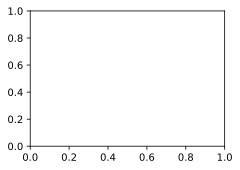

In [3]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

In [4]:
print(torch.cuda.is_available())

True


In [6]:
print(torch.cuda.device_count())

1
